# 83(b) tax form. Why you should do it on time. 

The 83(b) form tax form should be filled out within 30 days of receiving a stock grant consisting of restricted stock units which will vest over time. The form allows you to keep the cost basis of your grant the same as when you were granted the stock at the end of the vesting period. The most tax efficient way to vest shares of stock. 

It is not necessary that one fill out the tax form, it is only of benefit to the grantee. Refer to the following example:

---
5,000 shares of Example LLC Stock is granted to an individual on Jan 1st. 2020 at a price of \\$0.001 per share on a 4 year vesting schedule. This means the total purchase price is \\$5.00, which is either paid or deducted from employee's pay. The vesting schedule releases 1/4th of the stock after the first year, and then 1/48th of the stock vests every month thereafter until the full amount is reached in 4 years. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

s_grant = 0.001 # stock price on date of grant
n = 5000 # number of granted shares
total_granted = s_grant * n # total price of stock at grant date

print("Total purchase price: $%0.2f" % (total_granted))

Total purchase price: $5.00


## 83(b) form on time

In the scenario that you submitted the 83(b) form on time, the total purchase price is the cost basis of your stock purchase, and you won't have any capital gains while the stock vests. This means that you will not have to pay taxes over the years while your stock vests, and your only taxable income comes when you sell the stock and realize gains or losses.

For example, you wait until Jan 1st. 2024 when your stock is fully vested. After some fundraising and increase in company valuation, the price of the stock is now \\$1,000 per share, which is a 1,000,000x gain. Not bad!

In [2]:
s_sale = 1000 # price at sale
total_sold = s_sale * n # total value of stock when sold

print("Total amount of stock sale: ${:,}".format(total_sold))

Total amount of stock sale: $5,000,000


The 5,000 shares of stock are now worth \\$5M total. When you sell your stock on Jan 1st, 2024, your cost basis is still \\$0.001 since you haven't been forced to pay for the stock as it vests, so you will pay the capital gains tax on the final sale amount. The following assumes long term capital gains for the first 3 years and short term gains for the last year as well as no change in valuation over the 4 years of vesting. 


In [3]:
cg_short = 0.4 # Short term capital gains rate
cg_long = 0.2 # long term capital gains rate

gains = total_sold - total_granted # total capital gains on increased company valuation

gains_short = gains * 0.25 # total gains subject to short term gains tax
gains_long = gains * 0.75 # total gains subject to long term gains tax

taxes = gains_short*cg_short + gains_long*cg_long # total taxes levied
tax_rate = taxes/gains*100 # effective tax rate based on 1 year short term gains and 3 years long term gains. 

print("Tax burden of ${:,} on a capital gain of ${:,} for a {:0.2f} % tax rate".format(taxes, gains, tax_rate))

Tax burden of $1,249,998.75 on a capital gain of $4,999,995.0 for a 25.00 % tax rate


## 83(b) form not on time 

In this scenario, the individual doesn't submit the 83(b) form, which means the stock will vest accoridng to the schedule and the value of the stock will count as income yearly, and will be taxed every year as short term capital gains. A number of assumptions are required for this calculation: 
- Company value is not changing over the course of vesting
- Marginal income tax rate is set at 24% (for income between \\$95,375 - \\$182,100 for a single filer in 2023: [source](https://taxfoundation.org/publications/federal-tax-rates-and-tax-brackets/))

In [4]:
marginal_income_taxRate = 0.24

ones = np.ones(36)*1/48
vesting_schedule_full = np.concatenate(([0.25], ones))
vesting_schedule_simplified = np.ones(4)*0.25 # % of total stock grant vested per year
yearly_vest = vesting_schedule_simplified * n # shares of stock granted per year
yearly_vest_income = yearly_vest * s_sale # value of stock granted per year assuming stock price s_sale
yearly_vest_income_tax = yearly_vest_income * marginal_income_taxRate # income tax paid yearly on vested stock

taxes = sum(yearly_vest_income_tax)
tax_rate = taxes/gains*100

print("Tax burden of ${:,} on a capital gain of ${:,} for a {:0.2f} % tax rate".format(taxes, gains, tax_rate))

Tax burden of $1,200,000.0 on a capital gain of $4,999,995.0 for a 24.00 % tax rate


Allowing the stock to vest in this way and getting taxed yearly is not inherently better or worse for all individuals. The most tax advantaged way to realize these gains depends on your marginal income tax bracket as well as your cash on hand. If your income tax bracket is lower than the long term gains tax (20%), then it may make sense to take the stock grants as income yearly. However, this means that you must have cash on hand to pay the taxes on the stock as it is granted. This would mean that you have to sell a portion of the stock to pay the taxes on it. 

Additionally, the real world doesn't behave like the assumptions we made in the previous analysis. Stock prices change as valuations change, and this will change the tax optimal way to realize these gains. Below we will investigate the effects of an increasing stock price on the tax burden with and without the 83(b) form. 


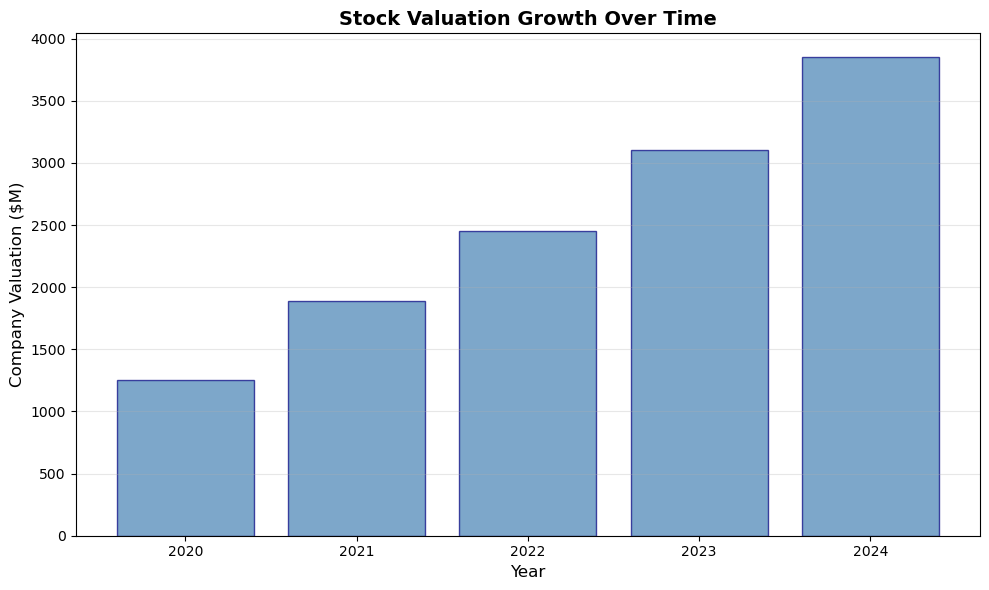

In [5]:
import matplotlib.pyplot as plt

# Sample bar chart with dummy data
categories = ['2020', '2021', '2022', '2023', '2024']
values = [1250, 1890, 2450, 3100, 3850]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='steelblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Company Valuation ($M)', fontsize=12)
plt.title('Stock Valuation Growth Over Time', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

get into next:
- chosing grant price, then sale price, and then a linarly variable price over the 4 years (potentially closest to reality). then also choose parabolic valuation increase as "best case" scenario
- calculate with 1/48th granting schedule, not just every year. 


Additional Resources:
- [accountalent](https://accountalent.com/868-2/)
- [Association of International Certified Processional Accountants](https://www.aicpa.org/news/article/what-to-do-for-a-missed-sec-83-b-election)
- [fidelity 83(b) filling instructions](https://www.fidelity.com/bin-public/060_www_fidelity_com/documents/customer-service/instructions-for-completing-irs-section-83b.pdf)
